In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload your images.zip file

import zipfile
import os

# Unzip uploaded file
with zipfile.ZipFile("images.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")

# Check extracted content
os.listdir("dataset")


Saving images.zip to images.zip


['images']

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os


In [ ]:
img_height = 288
img_width = 117
batch_size = 32

data_dir = "dataset"


In [ ]:
#BASIC CNN IMPLEMENTATION MODEL
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import os

# Paths and params
data_dir = '/content/dataset/images'
img_height, img_width = 117, 288
batch_size = 32

# Data generators
datagen = ImageDataGenerator(
    validation_split=0.2,
    rescale=1./255
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

# Simple CNN model
model = models.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')  # ✅ 3 classes
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # ✅ matches with class_mode='categorical'
    metrics=['accuracy']
)

# Train
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)


Found 2444 images belonging to 3 classes.
Found 610 images belonging to 3 classes.
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


77/77 ━━━━━━━━━━━━━━━━━━━━ 14s 105ms/step - accuracy: 0.8530 - loss: 0.3499 - val_accuracy: 0.9754 - val_loss: 0.1007
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.9754 - loss: 0.0792 - val_accuracy: 0.9754 - val_loss: 0.1044
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.9666 - loss: 0.0979 - val_accuracy: 0.9721 - val_loss: 0.1042
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.9769 - loss: 0.0645 - val_accuracy: 0.9754 - val_loss: 0.0879
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.9772 - loss: 0.0728 - val_accuracy: 0.9754 - val_loss: 0.0853
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.9687 - loss: 0.0877 - val_accuracy: 0.9754 - val_loss: 0.1106
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.9658 - loss: 0.0905 - val_accuracy: 0.9754 - val_loss: 0.0885
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.9715 - loss: 0.0719 - val_accuracy: 0.9705 - val_loss: 

In [ ]:
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9789 - loss: 0.1040
Validation Accuracy: 97.70%


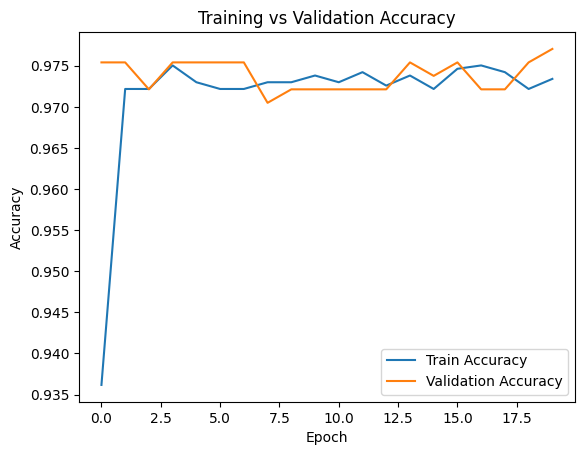

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()


In [ ]:
pip install -q -U keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.3 MB/s eta 0:00:00


In [ ]:
#HYPERPARAMETER TUNING FOR BETTER PERFORMANCE
import keras_tuner as kt
from tensorflow.keras import layers, models

def model_builder(hp):
    model = models.Sequential()
    model.add(layers.Input(shape=(117, 288, 3)))

    # Conv layer 1
    hp_filters = hp.Choice('filters', values=[32, 64, 128])
    model.add(layers.Conv2D(hp_filters, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D())

    # Conv layer 2
    model.add(layers.Conv2D(hp_filters * 2, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D())

    model.add(layers.Flatten())

    # Dense layer
    hp_units = hp.Choice('dense_units', [64, 128, 256])
    model.add(layers.Dense(units=hp_units, activation='relu'))

    # Dropout
    hp_dropout = hp.Choice('dropout_rate', [0.2, 0.4, 0.5])
    model.add(layers.Dropout(hp_dropout))

    model.add(layers.Dense(3, activation='softmax'))

    # Compile
    hp_learning_rate = hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [ ]:
tuner = kt.RandomSearch(
    model_builder,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner_dir',
    project_name='bottle_fill_tuning'
)

# Early stopping to speed things up
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Run search
tuner.search(train_generator, validation_data=val_generator, epochs=10, callbacks=[stop_early])


Trial 10 Complete [00h 01m 54s]
val_accuracy: 0.9409835934638977

Best val_accuracy So Far: 0.9770491719245911
Total elapsed time: 00h 13m 52s


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Best Hyperparameters:
- Filters: {best_hps.get('filters')}
- Dense units: {best_hps.get('dense_units')}
- Dropout rate: {best_hps.get('dropout_rate')}
- Learning rate: {best_hps.get('learning_rate')}
""")

# Build the model with the best configuration
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_generator, validation_data=val_generator, epochs=10)



Best Hyperparameters:
- Filters: 64
- Dense units: 256
- Dropout rate: 0.2
- Learning rate: 0.0001

Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 11s 109ms/step - accuracy: 0.8447 - loss: 0.5735 - val_accuracy: 0.9705 - val_loss: 0.1000
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.9755 - loss: 0.0909 - val_accuracy: 0.9754 - val_loss: 0.0856
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.9733 - loss: 0.0865 - val_accuracy: 0.9721 - val_loss: 0.0894
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.9738 - loss: 0.0755 - val_accuracy: 0.9705 - val_loss: 0.0867
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.9790 - loss: 0.0703 - val_accuracy: 0.9754 - val_loss: 0.0889
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.9713 - loss: 0.0823 - val_accuracy: 0.9721 - val_loss: 0.1007
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.9697 - loss: 0.0818 - val_accuracy: 0.9721 - val_loss: 0.0944
Epoch 8

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
📋 Classification Report:
              precision    recall  f1-score   support

normalfilled       0.84      0.82      0.83       506
  overfilled       0.16      0.16      0.16        79
 underfilled       0.03      0.04      0.04        25

    accuracy                           0.71       610
   macro avg       0.34      0.34      0.34       610
weighted avg       0.72      0.71      0.71       610



<Figure size 600x600 with 0 Axes>

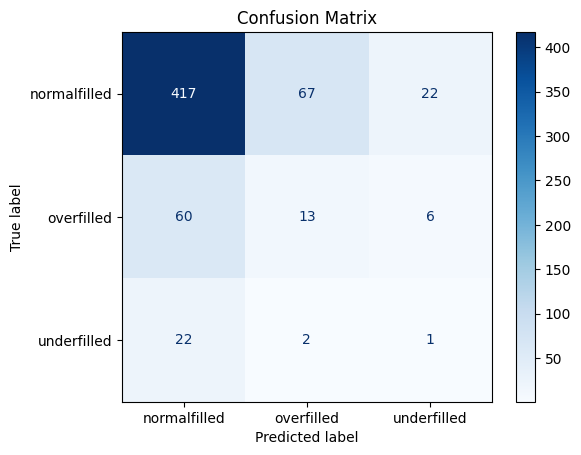

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get true labels and predictions
Y_true = val_generator.classes
class_indices = val_generator.class_indices
class_labels = list(class_indices.keys())

# Predict on validation data
val_generator.reset()
Y_pred_probs = model.predict(val_generator)
Y_pred = np.argmax(Y_pred_probs, axis=1)

# Classification Report
print("📋 Classification Report:")
print(classification_report(Y_true, Y_pred, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(Y_true, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

plt.figure(figsize=(6, 6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Get labels from training generator
y_train_labels = train_generator.classes  # These are the class indices

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_labels),
    y=y_train_labels
)

class_weight_dict = dict(enumerate(class_weights))
print("✅ Class Weights:", class_weight_dict)

# Fit the model using class weights
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    class_weight=class_weight_dict
)


✅ Class Weights: {0: np.float64(0.4023045267489712), 1: np.float64(2.5538140020898643), 2: np.float64(8.146666666666667)}
Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.9708 - loss: 0.0677 - val_accuracy: 0.9721 - val_loss: 0.1160
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.9750 - loss: 0.0541 - val_accuracy: 0.9656 - val_loss: 0.1083
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.9726 - loss: 0.0574 - val_accuracy: 0.9656 - val_loss: 0.1340
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.9701 - loss: 0.0543 - val_accuracy: 0.9689 - val_loss: 0.1269
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.9713 - loss: 0.0517 - val_accuracy: 0.9607 - val_loss: 0.1360
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.9672 - loss: 0.0658 - val_accuracy: 0.9607 - val_loss: 0.1293
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - accuracy: 0.9674 - loss: 0.0536 - val_accuracy: 0.9590 - val_lo

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
📋 Classification Report:
              precision    recall  f1-score   support

normalfilled       0.83      0.80      0.81       506
  overfilled       0.13      0.15      0.14        79
 underfilled       0.09      0.12      0.10        25

    accuracy                           0.69       610
   macro avg       0.35      0.36      0.35       610
weighted avg       0.71      0.69      0.70       610



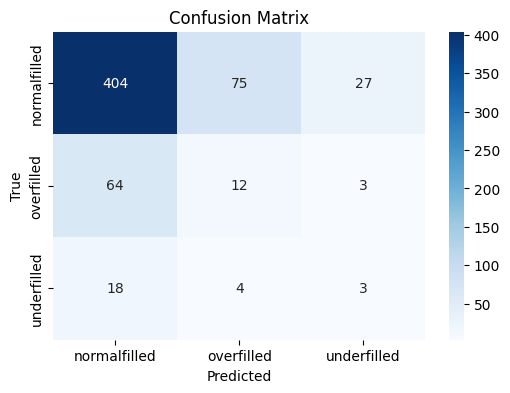

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions on validation set
val_generator.reset()
preds = model.predict(val_generator)
predicted_classes = np.argmax(preds, axis=1)

# True classes
true_classes = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

# Classification report
print("📋 Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
pip install albumentations opencv-python


In [ ]:
import cv2
import os
import albumentations as A
from datetime import datetime

# Paths
input_folder = "dataset/images/underfilled"
output_folder = "augmented_images/underfilled"
os.makedirs(output_folder, exist_ok=True)

# Define your augmentation pipeline
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.3),
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=15, p=0.5),
    A.GaussianBlur(p=0.2),
    A.RandomShadow(p=0.2),
])

# Loop through images
for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        path = os.path.join(input_folder, filename)
        image = cv2.imread(path)

        for i in range(3):  # Generate 3 augmentations per image
            augmented = transform(image=image)["image"]
            name = f"{os.path.splitext(filename)[0]}_aug{i+1}.jpg"
            cv2.imwrite(os.path.join(output_folder, name), augmented)

print("✅ Augmented images saved to:", output_folder)


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.6' (you have '2.0.5'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


✅ Augmented images saved to: augmented_images/underfilled


In [ ]:
import os
import shutil

# Paths
merged_base = '/content/merged_dataset'
os.makedirs(merged_base, exist_ok=True)

# Define the class folders
classes = ['underfilled', 'overfilled', 'normalfilled']

# Source paths
sources = {
    'underfilled': [
        '/content/dataset/images/underfilled',
        '/content/augmented_images/underfilled'
    ],
    'overfilled': [
        '/content/dataset/images/overfilled'
    ],
    'normalfilled': [
        '/content/dataset/images/normalfilled'
    ]
}

# Copy files into merged structure
for label in classes:
    target_dir = os.path.join(merged_base, label)
    os.makedirs(target_dir, exist_ok=True)

    for src_dir in sources[label]:
        for fname in os.listdir(src_dir):
            src_path = os.path.join(src_dir, fname)
            dest_path = os.path.join(target_dir, fname)
            if os.path.isfile(src_path):
                shutil.copy2(src_path, dest_path)

print("✅ All images merged successfully.")


✅ All images merged successfully.


In [ ]:
#FINAL TRAINING AFTER ADDING WEIGHTS AND AUGMENTATION OF UNDERFILLED IMAGES FOR BETTER RESULTS
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Directory with merged data
dataset_path = '/content/merged_dataset'

# Image dimensions
img_height, img_width = 117, 288
batch_size = 32

# Data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Build model with best hyperparameters
model = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(3, activation='softmax')  # 3 classes
])

# Compile
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


Found 2744 images belonging to 3 classes.
Found 685 images belonging to 3 classes.
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


86/86 ━━━━━━━━━━━━━━━━━━━━ 22s 196ms/step - accuracy: 0.7877 - loss: 0.5664 - val_accuracy: 0.9796 - val_loss: 0.0996
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.9547 - loss: 0.1265 - val_accuracy: 0.9650 - val_loss: 0.1348
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - accuracy: 0.9561 - loss: 0.1148 - val_accuracy: 0.9781 - val_loss: 0.0873
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.9532 - loss: 0.1182 - val_accuracy: 0.9781 - val_loss: 0.0949
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.9665 - loss: 0.1132 - val_accuracy: 0.9766 - val_loss: 0.0880
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - accuracy: 0.9606 - loss: 0.0992 - val_accuracy: 0.9766 - val_loss: 0.0832
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.9708 - loss: 0.0898 - val_accuracy: 0.9796 - val_loss: 0.0829
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - accuracy: 0.9628 - loss: 0.0927 - val_accuracy: 0.9781 - val_los

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step
📋 Classification Report:
               precision    recall  f1-score   support

normalfilled       0.99      0.98      0.98       506
  overfilled       0.90      0.95      0.93        79
 underfilled       0.96      1.00      0.98       100

    accuracy                           0.98       685
   macro avg       0.95      0.98      0.96       685
weighted avg       0.98      0.98      0.98       685



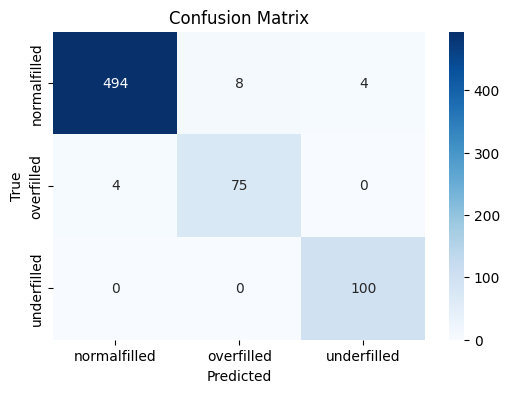

In [ ]:
# Predict
val_generator.reset()
preds = model.predict(val_generator)
predicted_classes = np.argmax(preds, axis=1)

# True labels
true_classes = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

# Report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("📋 Classification Report:\n", report)

conf_matrix = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


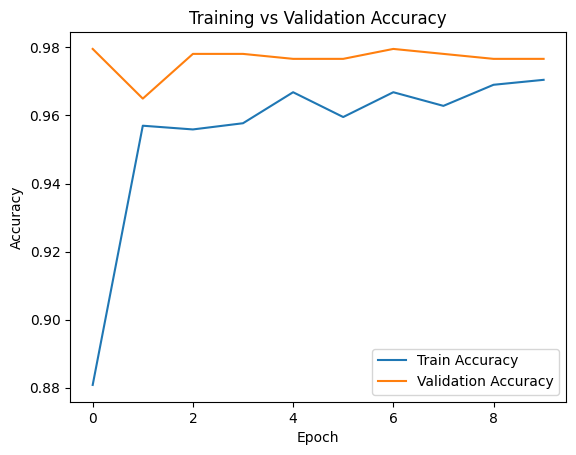

In [ ]:

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()


In [ ]:
#TESTING ON RANDOM IMAGES FOR OVERFITTING
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and resize the image to expected dimensions
img_path = '/content/test4.jpg'  # 👈 update with your test image path
img = image.load_img(img_path, target_size=(117, 288))  # height, width
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Make it (1, 117, 288, 3)

# Predict
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)

# Your label order
class_labels = ['normalfilled', 'overfilled', 'underfilled']
print("Predicted Class:", class_labels[predicted_class[0]])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted Class: normalfilled


In [ ]:
#IMPLEMENTING MOBILENETV2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import numpy as np

# Setup
img_height, img_width = 160, 160  # Required input for MobileNetV2
batch_size = 32
dataset_path = '/content/merged_dataset'

# Data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Load base MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False  # Freeze base

# Add custom head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
x = Dense(64, activation='relu')(x)
output = Dense(3, activation='softmax')(x)  # 3 classes

model = Model(inputs=base_model.input, outputs=output)

# Compile
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


Found 2744 images belonging to 3 classes.
Found 685 images belonging to 3 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 182ms/step - accuracy: 0.7147 - loss: 0.6765 - val_accuracy: 0.9036 - val_loss: 0.2424
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9059 - loss: 0.2592 - val_accuracy: 0.9533 - val_loss: 0.1350
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.9477 - loss: 0.1640 - val_accuracy: 0.9723 - val_loss: 0.1051
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.9516 - loss: 0.1267 - val_accuracy: 0.9737 - val_loss: 0.0955
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.9605 - loss: 0.1307 - val_accuracy: 0.9737 - val_loss: 0.0969
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.9684 - loss: 0.1059 - val_accuracy: 0.9737 - val_loss: 0.0958
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.9716 - loss: 0.0972 - val_accuracy: 0.9752 - val_loss: 0.0919
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.9688 - loss: 0.1047 - val_accuracy: 0.9766 - val_loss: 

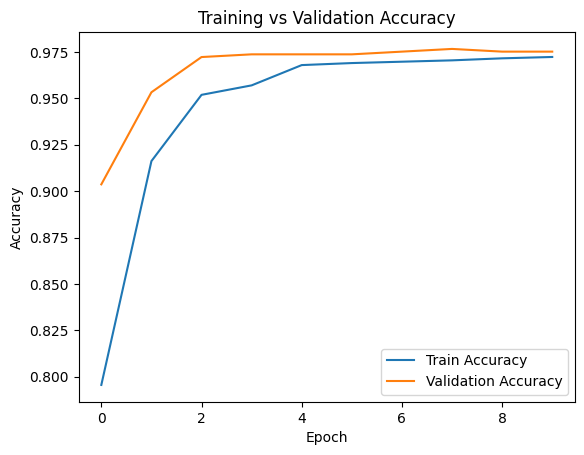

In [ ]:

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()


In [ ]:
print("Are true labels aligned?", np.array_equal(val_gen.classes, val_generator.classes))


Are true labels aligned? True


In [ ]:
val_gen.reset()
preds = model.predict(val_gen, verbose=1)
predicted_classes = np.argmax(preds, axis=1)

true_classes = val_gen.classes
class_labels = list(val_gen.class_indices.keys())

print("📋 Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 171ms/step
📋 Classification Report:
              precision    recall  f1-score   support

normalfilled       0.99      0.98      0.98       506
  overfilled       0.90      0.94      0.92        79
 underfilled       0.96      1.00      0.98       100

    accuracy                           0.98       685
   macro avg       0.95      0.97      0.96       685
weighted avg       0.98      0.98      0.98       685



In [ ]:
cm = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[494   8   4]
 [  5  74   0]
 [  0   0 100]]


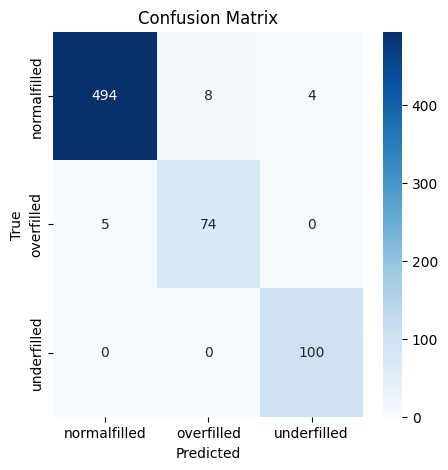

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
